In [ ]:
import os
import pandas as pd
import time
import sys

In [299]:
csv_path = "/content/drive/MyDrive/DataBootcamp_Project4/data/Group6_Project4_data.csv"
#csv_path = "/content/drive/MyDrive/DataBootcamp_Project4/data/allcollegedata.csv"
bb_players_df = pd.read_csv(csv_path)
#bb_players_df.head(10)

bb_add_info_df = pd.read_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/player_add_info.csv",dtype={'player_position': 'str', 'player_height': 'int','player_weight': 'int','process_status': 'str'})
#bb_add_info_df.head(10)
#bb_players_df.head()

bb_merged_df = bb_players_df.merge(bb_add_info_df,how="left",left_on=['player_name','year','team'],right_on=['player_name','year','team'],suffixes=(None, '_addinfo'))
bb_merged_df.drop(columns=["Unnamed: 0","Height","Weight","Position"] , inplace=True)
bb_merged_df.rename(columns={'player_height':'Height','player_position':'Position','player_weight':'Weight',"Blank1":"Detail_Position"},inplace=True)
bb_merged_df['target']=bb_merged_df['Draft Pick Y/N']
# Drop the non-beneficial EIN column
bb_merged_df.drop(columns=['rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)','Tweet Data','Trending Data', 'Wingspan','Draft Year','NBA Rings', 'NBA Champion YN','num','ht',"Rec Rank","pick","Detail_Position","Draft Pick Y/N"],inplace=True)
#bb_merged_df.drop(columns=["Detail_Position"] , inplace=True)
#application_df.drop(columns=["pick","ht","Rec Rank","Draft Pick Y/N"] , inplace=True)
bb_merged_df.loc[bb_merged_df['process_status'] != 'Success', 'Height'] = 184.070618
bb_merged_df.loc[bb_merged_df['process_status'] != 'Success', 'Weight'] = 85.602791
bb_merged_df.loc[bb_merged_df['process_status'] != 'Success', 'Position'] = "Guard"

bb_merged_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ast,stl,blk,pts,NotSure1,Position,Height,Weight,process_status,target
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,1.1923,0.3462,0.0385,3.8846,6.22026,Guard,188.0,79.0,Success,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,1.8235,0.4118,0.2353,5.9412,3.94375,Guard,193.0,86.0,Success,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,1.9630,0.4815,0.0000,12.1852,10.92680,Guard,193.0,92.0,Success,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,1.1000,0.5667,0.1333,4.9333,6.77427,Guard,193.0,86.0,Success,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,0.8485,0.4545,0.3333,7.5758,0.00000,Forward,198.0,102.0,Success,0


In [300]:
csv_path = "/content/drive/MyDrive/DataBootcamp_Project4/data/CollegeBasketballPlayers2022.csv"
#csv_path = "/content/drive/MyDrive/DataBootcamp_Project4/data/allcollegedata.csv"
bb_players_2022_df = pd.read_csv(csv_path)
bb_players_2022_df.head(10)
bb_add_info_2022_df = pd.read_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/player_add_info_20220_10000.csv",dtype={'player_position': 'str', 'player_height': 'int','player_weight': 'int','process_status': 'str'})
#bb_add_info_df.head(10)
#bb_add_info_2022_df.head()
bb_merged_2022_df = bb_players_2022_df.merge(bb_add_info_2022_df,how="left",left_on=['player_name','year','team'],right_on=['player_name','year','team'],suffixes=(None, '_addinfo'))
#bb_merged_2022_df.columns
bb_merged_2022_df.drop(columns=["Unnamed: 0"] , inplace=True)
bb_merged_2022_df.rename(columns={'player_height':'Height','player_position':'Position','player_weight':'Weight',"Unnamed: 64":"Detail_Position","Unnamed: 65":"NotSure1"},inplace=True)
bb_merged_2022_df.drop(columns=['rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)'],inplace=True)
bb_merged_2022_df.loc[bb_merged_2022_df['process_status'] != 'Success', 'Height'] = 184.070618
bb_merged_2022_df.loc[bb_merged_2022_df['process_status'] != 'Success', 'Weight'] = 85.602791
bb_merged_2022_df.loc[bb_merged_2022_df['process_status'] != 'Success', 'Position'] = "Guard"
bb_merged_2022_df['target']=0
bb_merged_2022_df.drop(columns=["pick","ht","Rec Rank","Detail_Position"] , inplace=True)
#bb_merged_2022_df.drop(columns=["process_status"] , inplace=True)
bb_merged_2022_df.drop(columns=["num"] , inplace=True)
bb_merged_2022_df.head()


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,ast,stl,blk,pts,NotSure1,Position,Height,Weight,process_status,target
0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,...,0.4545,0.1818,0.0000,2.3636,12.226400,Guard,183.0,86.0,Success,0
1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,...,1.1739,0.8261,0.0870,14.3043,11.095900,Guard,193.0,84.0,Success,0
2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,9.1,...,1.1500,1.2500,0.2000,16.3500,0.284581,Guard,190.0,90.0,Success,0
3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,5.8,...,0.9062,0.5938,0.0625,10.8125,10.140700,Forward,201.0,99.0,Success,0
4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,7.0,...,0.8276,0.8276,0.2414,3.6552,2.562430,Forward,206.0,108.0,Success,0


In [301]:
combined_df = pd.concat([bb_merged_df,bb_merged_2022_df])

In [302]:
combined_df["player_index"]=combined_df["player_name"]+"-"+combined_df["year"].astype(str)+"-"+combined_df["team"]
combined_df.drop(columns=["player_name","team","process_status"],inplace=True)
combined_df.set_index("player_index")

,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,treb,ast,stl,blk,pts,NotSure1,Position,Height,Weight,target
player_index,,,,,,,,,,,,,,,,,,,,,
DeAndrae Ross-2009-South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,...,0.8077,1.1923,0.3462,0.0385,3.8846,6.22026,Guard,188.000000,79.000000,0
Pooh Williams-2009-Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,...,1.9412,1.8235,0.4118,0.2353,5.9412,3.94375,Guard,193.000000,86.000000,0
Jesus Verdejo-2009-South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,...,2.9630,1.9630,0.4815,0.0000,12.1852,10.92680,Guard,193.000000,92.000000,0
Mike Hornbuckle-2009-Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,...,2.1333,1.1000,0.5667,0.1333,4.9333,6.77427,Guard,193.000000,86.000000,0
Anthony Brown-2009-Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,...,4.7273,0.8485,0.4545,0.3333,7.5758,0.00000,Forward,198.000000,102.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aquan Smart-2022-FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,1.8,12.2,10.5,...,NaN,NaN,NaN,NaN,NaN,NaN,Guard,190.000000,90.000000,0
Chase Barrs-2022-Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,5.4,8.7,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,Forward,206.000000,83.000000,0
Hugo Clarkin-2022-Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,2.9,13.9,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,Center,213.000000,97.000000,0


In [303]:
combined_df["player_index"].nunique()

65039

In [ ]:
#train_set_df = combined_df.drop(columns=["player_name","team","process_status"])

In [304]:
combined_df.to_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/combined_data_set.csv")

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#history = History()

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/combined_data_set.csv")
application_df.drop(columns=["Unnamed: 0"],inplace=True)
application_df.set_index("player_index")

application_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65039 entries, 0 to 65038
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   conf          65039 non-null  object 
 1   GP            65039 non-null  int64  
 2   Min_per       65039 non-null  float64
 3   Ortg          65039 non-null  float64
 4   usg           65039 non-null  float64
 5   eFG           65039 non-null  float64
 6   TS_per        65039 non-null  float64
 7   ORB_per       65039 non-null  float64
 8   DRB_per       65039 non-null  float64
 9   AST_per       65039 non-null  float64
 10  TO_per        65039 non-null  float64
 11  FTM           65039 non-null  int64  
 12  FTA           65039 non-null  int64  
 13  FT_per        65039 non-null  float64
 14  twoPM         65039 non-null  int64  
 15  twoPA         65039 non-null  int64  
 16  twoP_per      65039 non-null  float64
 17  TPM           65039 non-null  int64  
 18  TPA           65039 non-nu

In [306]:
application_df.drop(columns=['ast/tov', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'NotSure1'],inplace=True)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65039 entries, 0 to 65038
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   conf          65039 non-null  object 
 1   GP            65039 non-null  int64  
 2   Min_per       65039 non-null  float64
 3   Ortg          65039 non-null  float64
 4   usg           65039 non-null  float64
 5   eFG           65039 non-null  float64
 6   TS_per        65039 non-null  float64
 7   ORB_per       65039 non-null  float64
 8   DRB_per       65039 non-null  float64
 9   AST_per       65039 non-null  float64
 10  TO_per        65039 non-null  float64
 11  FTM           65039 non-null  int64  
 12  FTA           65039 non-null  int64  
 13  FT_per        65039 non-null  float64
 14  twoPM         65039 non-null  int64  
 15  twoPA         65039 non-null  int64  
 16  twoP_per      65039 non-null  float64
 17  TPM           65039 non-null  int64  
 18  TPA           65039 non-nu

In [307]:
application_df.columns

Index(['conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per',
       'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM',
       'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per',
       'ftr', 'yr', 'porpag', 'adjoe', 'pfr', 'year', 'pid', 'type',
       'Position', 'Height', 'Weight', 'target', 'player_index'],
      dtype='object')

In [308]:
application_df["yr"].mode()

0    Jr
dtype: object

In [309]:
application_df["yr"].fillna('Jr',inplace=True)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65039 entries, 0 to 65038
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   conf          65039 non-null  object 
 1   GP            65039 non-null  int64  
 2   Min_per       65039 non-null  float64
 3   Ortg          65039 non-null  float64
 4   usg           65039 non-null  float64
 5   eFG           65039 non-null  float64
 6   TS_per        65039 non-null  float64
 7   ORB_per       65039 non-null  float64
 8   DRB_per       65039 non-null  float64
 9   AST_per       65039 non-null  float64
 10  TO_per        65039 non-null  float64
 11  FTM           65039 non-null  int64  
 12  FTA           65039 non-null  int64  
 13  FT_per        65039 non-null  float64
 14  twoPM         65039 non-null  int64  
 15  twoPA         65039 non-null  int64  
 16  twoP_per      65039 non-null  float64
 17  TPM           65039 non-null  int64  
 18  TPA           65039 non-nu

In [310]:
# we have to put these at the end because one hot encoder does not work or else
#application_df["yr"].fillna(application_df["yr"].mode(),inplace=True)
application_df.fillna(application_df.mean(), inplace=True)
application_df["conference"]=application_df["conf"]
application_df["player_yr"] = application_df["yr"]
application_df["player_pos"]=application_df["Position"]

application_df.drop(columns=["conf","yr","Position","type"],inplace=True)


application_df.set_index("player_index")
application_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65039 entries, 0 to 65038
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GP            65039 non-null  int64  
 1   Min_per       65039 non-null  float64
 2   Ortg          65039 non-null  float64
 3   usg           65039 non-null  float64
 4   eFG           65039 non-null  float64
 5   TS_per        65039 non-null  float64
 6   ORB_per       65039 non-null  float64
 7   DRB_per       65039 non-null  float64
 8   AST_per       65039 non-null  float64
 9   TO_per        65039 non-null  float64
 10  FTM           65039 non-null  int64  
 11  FTA           65039 non-null  int64  
 12  FT_per        65039 non-null  float64
 13  twoPM         65039 non-null  int64  
 14  twoPA         65039 non-null  int64  
 15  twoP_per      65039 non-null  float64
 16  TPM           65039 non-null  int64  
 17  TPA           65039 non-null  int64  
 18  TP_per        65039 non-nu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [311]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat.remove("player_index")
application_cat

['conference', 'player_yr', 'player_pos']

In [312]:
# Create a OneHotEncoder instance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()
# Merge one-hot encoded features and drop the originals
application_df_new = application_df.merge(encode_df,left_index=True, right_index=True)
application_df_new = application_df_new.drop(application_cat,axis=1)
application_df_new.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,player_yr_42.9,player_yr_57.1,player_yr_Fr,player_yr_Jr,player_yr_None,player_yr_So,player_yr_Sr,player_pos_Center,player_pos_Forward,player_pos_Guard
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [313]:
application_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65039 entries, 0 to 65038
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GP                  65039 non-null  int64  
 1   Min_per             65039 non-null  float64
 2   Ortg                65039 non-null  float64
 3   usg                 65039 non-null  float64
 4   eFG                 65039 non-null  float64
 5   TS_per              65039 non-null  float64
 6   ORB_per             65039 non-null  float64
 7   DRB_per             65039 non-null  float64
 8   AST_per             65039 non-null  float64
 9   TO_per              65039 non-null  float64
 10  FTM                 65039 non-null  int64  
 11  FTA                 65039 non-null  int64  
 12  FT_per              65039 non-null  float64
 13  twoPM               65039 non-null  int64  
 14  twoPA               65039 non-null  int64  
 15  twoP_per            65039 non-null  float64
 16  TPM 

In [314]:
# split the data into the predict and testtrain set based on year
predict_set_df = application_df_new[application_df["year"]==2022]
predict_set_df.columns
testtrain_df = application_df_new[application_df["year"]!=2022]
predict_set_df.set_index("player_index",inplace=True)
testtrain_df.set_index("player_index",inplace=True)

testtrain_df.columns


Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr',
       'porpag', 'adjoe', 'pfr', 'year', 'pid', 'Height', 'Weight', 'target',
       'conference_A10', 'conference_ACC', 'conference_AE', 'conference_ASun',
       'conference_Amer', 'conference_B10', 'conference_B12', 'conference_BE',
       'conference_BSky', 'conference_BSth', 'conference_BW', 'conference_CAA',
       'conference_CUSA', 'conference_GWC', 'conference_Horz',
       'conference_Ind', 'conference_Ivy', 'conference_MAAC', 'conference_MAC',
       'conference_MEAC', 'conference_MVC', 'conference_MWC', 'conference_NEC',
       'conference_OVC', 'conference_P10', 'conference_P12', 'conference_Pat',
       'conference_SB', 'conference_SC', 'conference_SEC', 'conference_SWAC',
       'conference_Slnd', 'conference_Sum', 'conference_WAC', 'conference_WCC',
    

In [315]:
predict_set_df.columns

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr',
       'porpag', 'adjoe', 'pfr', 'year', 'pid', 'Height', 'Weight', 'target',
       'conference_A10', 'conference_ACC', 'conference_AE', 'conference_ASun',
       'conference_Amer', 'conference_B10', 'conference_B12', 'conference_BE',
       'conference_BSky', 'conference_BSth', 'conference_BW', 'conference_CAA',
       'conference_CUSA', 'conference_GWC', 'conference_Horz',
       'conference_Ind', 'conference_Ivy', 'conference_MAAC', 'conference_MAC',
       'conference_MEAC', 'conference_MVC', 'conference_MWC', 'conference_NEC',
       'conference_OVC', 'conference_P10', 'conference_P12', 'conference_Pat',
       'conference_SB', 'conference_SC', 'conference_SEC', 'conference_SWAC',
       'conference_Slnd', 'conference_Sum', 'conference_WAC', 'conference_WCC',
    

In [316]:
predict_set_df.drop(columns=["target"],inplace=True)
predict_set_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3978 entries, Isaiah Felder-2022-South Carolina St. to Zane Butler-2022-SIU Edwardsville
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GP                  3978 non-null   int64  
 1   Min_per             3978 non-null   float64
 2   Ortg                3978 non-null   float64
 3   usg                 3978 non-null   float64
 4   eFG                 3978 non-null   float64
 5   TS_per              3978 non-null   float64
 6   ORB_per             3978 non-null   float64
 7   DRB_per             3978 non-null   float64
 8   AST_per             3978 non-null   float64
 9   TO_per              3978 non-null   float64
 10  FTM                 3978 non-null   int64  
 11  FTA                 3978 non-null   int64  
 12  FT_per              3978 non-null   float64
 13  twoPM               3978 non-null   int64  
 14  twoPA               3978 non-null   int64  


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [317]:
testtrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61061 entries, DeAndrae Ross-2009-South Alabama to Jaden Jones-2021-Rutgers
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GP                  61061 non-null  int64  
 1   Min_per             61061 non-null  float64
 2   Ortg                61061 non-null  float64
 3   usg                 61061 non-null  float64
 4   eFG                 61061 non-null  float64
 5   TS_per              61061 non-null  float64
 6   ORB_per             61061 non-null  float64
 7   DRB_per             61061 non-null  float64
 8   AST_per             61061 non-null  float64
 9   TO_per              61061 non-null  float64
 10  FTM                 61061 non-null  int64  
 11  FTA                 61061 non-null  int64  
 12  FT_per              61061 non-null  float64
 13  twoPM               61061 non-null  int64  
 14  twoPA               61061 non-null  int64  
 15  twoP_per

In [318]:
# Split our preprocessed data into our features and target arrays
y = testtrain_df["target"]
X = testtrain_df.drop(["target"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [319]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45795 entries, Jeremy Combs-2017-North Texas to Demetrius McReynolds-2017-Eastern Illinois
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GP                  45795 non-null  int64  
 1   Min_per             45795 non-null  float64
 2   Ortg                45795 non-null  float64
 3   usg                 45795 non-null  float64
 4   eFG                 45795 non-null  float64
 5   TS_per              45795 non-null  float64
 6   ORB_per             45795 non-null  float64
 7   DRB_per             45795 non-null  float64
 8   AST_per             45795 non-null  float64
 9   TO_per              45795 non-null  float64
 10  FTM                 45795 non-null  int64  
 11  FTA                 45795 non-null  int64  
 12  FT_per              45795 non-null  float64
 13  twoPM               45795 non-null  int64  
 14  twoPA               45795 non-null  int64 

In [320]:
counts=testtrain_df["target"].value_counts()
counts[1]

1435

In [368]:
import numpy as np

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.1 / counts[1]

In [ ]:
#mean = np.mean(X_train_scaled, axis=0)
#X_train_scaled -= mean
#X_test_scaled -= mean
#std = np.std(X_train_scaled, axis=0)
#X_train_scaled /= std
#X_test_scaled /= std

In [369]:
X_train.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,player_yr_42.9,player_yr_57.1,player_yr_Fr,player_yr_Jr,player_yr_None,player_yr_So,player_yr_Sr,player_pos_Center,player_pos_Forward,player_pos_Guard
player_index,,,,,,,,,,,,,,,,,,,,,
Jeremy Combs-2017-North Texas,13,30.4,98.2,21.4,55.4,55.38,8.8,17.7,4.4,19.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Jake Killingsworth-2017-Columbia,23,34.8,104.9,16.0,49.5,50.92,7.6,9.2,12.4,15.7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Akim Mitchell-2017-Hampton,28,46.2,94.0,16.8,47.2,50.66,7.0,12.8,10.6,23.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Phillip Reed-2014-Hampton,8,2.4,70.4,7.3,0.0,51.28,3.5,17.8,5.7,50.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Justin Jordan-2015-Milwaukee,28,53.6,87.7,15.4,46.9,48.67,1.2,9.7,11.7,22.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [370]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
predict_set_scaled = X_scaler.transform(predict_set_df)


In [371]:
xvals = X_train_scaled.shape[0]
xvals

45795

In [372]:
from tensorflow import keras
model = keras.Sequential(
    [
        keras.layers.Dense(
            100, activation="relu", input_shape=(X_train_scaled.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="tanh"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="tanh"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               7700      
                                                                 
 dense_21 (Dense)            (None, 256)               25856     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)              

In [373]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("ncaa_dp_model_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train_scaled,
    y_train,
    batch_size=2048,
    epochs=200,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weight,
)

Epoch 1/200
23/23 - 6s - loss: 1.5020e-05 - fn: 149.0000 - fp: 12211.0000 - tn: 32518.0000 - tp: 917.0000 - precision: 0.0699 - recall: 0.8602 - val_loss: 0.3377 - val_fn: 22.0000 - val_fp: 2273.0000 - val_tn: 12624.0000 - val_tp: 347.0000 - val_precision: 0.1324 - val_recall: 0.9404 - 6s/epoch - 247ms/step
Epoch 2/200
23/23 - 2s - loss: 8.9256e-06 - fn: 85.0000 - fp: 5813.0000 - tn: 38916.0000 - tp: 981.0000 - precision: 0.1444 - recall: 0.9203 - val_loss: 0.2800 - val_fn: 30.0000 - val_fp: 1774.0000 - val_tn: 13123.0000 - val_tp: 339.0000 - val_precision: 0.1604 - val_recall: 0.9187 - 2s/epoch - 85ms/step
Epoch 3/200
23/23 - 2s - loss: 7.3107e-06 - fn: 51.0000 - fp: 4993.0000 - tn: 39736.0000 - tp: 1015.0000 - precision: 0.1689 - recall: 0.9522 - val_loss: 0.2477 - val_fn: 32.0000 - val_fp: 1595.0000 - val_tn: 13302.0000 - val_tp: 337.0000 - val_precision: 0.1744 - val_recall: 0.9133 - 2s/epoch - 84ms/step
Epoch 4/200
23/23 - 2s - loss: 6.7622e-06 - fn: 58.0000 - fp: 4655.0000 - tn: 

In [374]:
y_train.value_counts()

0    44729
1     1066
Name: target, dtype: int64

In [375]:
y_test.value_counts()

0    14897
1      369
Name: target, dtype: int64

In [376]:
model.save("/content/drive/MyDrive/DataBootcamp_Project4/code/NCAA_DP_with_class_weight.h5")

In [377]:
predict_set_df

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,player_yr_42.9,player_yr_57.1,player_yr_Fr,player_yr_Jr,player_yr_None,player_yr_So,player_yr_Sr,player_pos_Center,player_pos_Forward,player_pos_Guard
player_index,,,,,,,,,,,,,,,,,,,,,
Isaiah Felder-2022-South Carolina St.,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Jalen Coleman-Lands-2022-Kansas,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
K.J. Walton-2022-Akron,20,63.0,108.6,26.5,54.3,58.88,9.1,12.6,8.9,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Jeriah Horne-2022-Tulsa,32,61.3,116.0,20.8,55.2,58.61,5.8,23.0,7.5,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Eric Curry-2022-Minnesota,29,39.2,95.1,14.7,46.3,48.72,7.0,13.7,10.2,20.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aquan Smart-2022-FIU,21,11.7,69.4,17.7,32.1,36.08,1.8,12.2,10.5,22.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Chase Barrs-2022-Florida A&M,14,11.0,85.1,8.8,42.9,40.61,5.4,8.7,8.1,22.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Hugo Clarkin-2022-Sacramento St.,16,22.8,99.7,7.8,70.6,68.67,2.9,13.9,5.9,33.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [378]:
pred_df.describe()

,Draft Pred,Draft Pick
count,3978.000000,3978.000000
mean,0.003254,0.004525
std,0.048087,0.067123
min,0.000273,0.000000
25%,0.000274,0.000000
50%,0.000275,0.000000
75%,0.000277,0.000000
max,0.996955,1.000000


In [379]:
draft_stats = pred_df.describe()


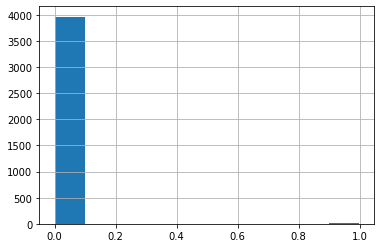

In [382]:

predict_2022_dp=model.predict(predict_set_scaled)
predict_2022_dp.dtype



pred_df["Draft Pred"] = predict_2022_dp

pred_df["Draft Pred"].hist()

pred_df["Draft Pick"] = 0
pred_df["Draft Pick"] = pred_df["Draft Pick"]
pred_df.loc[pred_df["Draft Pred"] > (0.003254+ .5*0.048087), "Draft Pick"] = 1

#pd.set_option('max_rows', 30)

#pred = np.argmax(predict_2022_dp, axis = 1)[:] 
#pred.shape
#pred_df = pd.DataFrame({"Draft Pred":pred})
#label = np.argmax(y_test,axis = 1)[:5] 

pred_df.value_counts("Draft Pick")
#print(pred) 
#print(label)
#predict_2022_dp
draft_pick_players=predict_set_df.reset_index()

new_draft_df=draft_pick_players.join(pred_df)
#pred_df
#pd.merge(predict_set_df, draft_pick_players, left_index=True, right_index=True)
new_draft_df.loc[pred_df["Draft Pick"] == 1]

new_draft_df.to_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/Draft_picks_precision_cw.csv")

In [383]:
new_draft_df["Draft Pick"].value_counts()

0    3960
1      18
Name: Draft Pick, dtype: int64

In [ ]:
predict_set_scaled = X_scaler.transform(predict_set_df)

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
X_train_scaled.shape[1]

76

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=20,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=metrics)
    
    return nn_model
  

In [ ]:
# Import the kerastuner library


tuner = kt.Hyperband(
    create_model,
    objective=kt.Objective("val_fn", direction="min"),
    max_epochs=30,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test),class_weight=class_weight)

Trial 61 Complete [00h 02m 24s]
val_fn: 8.0

Best val_fn So Far: 0.0
Total elapsed time: 00h 19m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
best_model.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

478/478 - 2s - loss: 1.1327 - fn: 22.0000 - fp: 31455.0000 - tn: 13236.0000 - tp: 1085.0000 - precision: 0.0333 - recall: 0.9801 - 2s/epoch - 5ms/step


[1.1326847076416016,
 22.0,
 31455.0,
 13236.0,
 1085.0,
 0.03334357589483261,
 0.9801264405250549]

In [ ]:
# Export our model to HDF5 file
best_model.save("/content/drive/MyDrive/DataBootcamp_Project4/code/NCAA_DP_model_Optimization_ht_valfn.h5")

In [ ]:
pred_df.describe()

,Draft Pred,Draft Pick
count,3978.000000,3978.0
mean,0.683814,1.0
std,0.000032,0.0
min,0.683775,1.0
25%,0.683780,1.0
50%,0.683782,1.0
75%,0.683784,1.0
max,0.683791,1.0


In [ ]:
predict_2022_dp

array([[0.68378824],
       [0.6837846 ],
       [0.68378097],
       ...,
       [0.68377846],
       [0.6837808 ],
       [0.6837857 ]], dtype=float32)

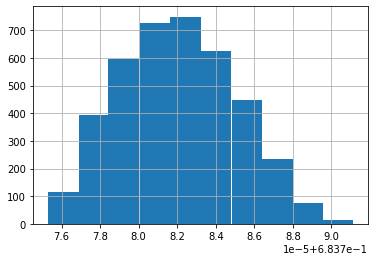

In [ ]:
predict_2022_dp=best_model.predict(predict_set_scaled)
predict_2022_dp.dtype



pred_df["Draft Pred"] = predict_2022_dp

pred_df["Draft Pred"].hist()

pred_df["Draft Pick"] = 0
pred_df["Draft Pick"] = pred_df["Draft Pick"]
pred_df.loc[pred_df["Draft Pred"] > (0.613814), "Draft Pick"] = 1

#pd.set_option('max_rows', 30)

#pred = np.argmax(predict_2022_dp, axis = 1)[:] 
#pred.shape
#pred_df = pd.DataFrame({"Draft Pred":pred})
#label = np.argmax(y_test,axis = 1)[:5] 

pred_df.value_counts("Draft Pick")
#print(pred) 
#print(label)
#predict_2022_dp
draft_pick_players=predict_set_df.reset_index()

new_draft_df=draft_pick_players.join(pred_df)
#pred_df
#pd.merge(predict_set_df, draft_pick_players, left_index=True, right_index=True)
new_draft_df.loc[pred_df["Draft Pick"] == 1]

new_draft_df.to_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/Draft_picks_ht_fn.csv")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rand_clas = RandomForestClassifier(random_state=1, n_estimators=50,max_depth=10)
# Fitting the model
clf=rand_clas.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.9841904138006332
Testing Score: 0.9781213153412813


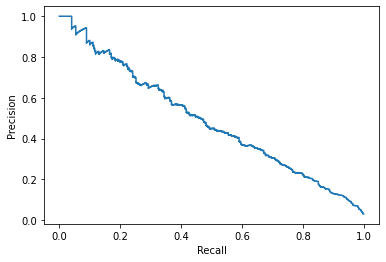

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
y_score = clf.predict_proba(X_test_scaled)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

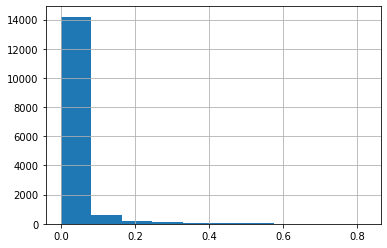

In [ ]:
pd.Series(y_score).hist()

In [ ]:
predict_2022_dp=clf.predict(predict_set_scaled)
predict_2022_dp.dtype
pred_df["Draft Pred"] = predict_2022_dp
pred_df.describe()

,Draft Pred,Draft Pick
count,3978.000000,3978.0
mean,0.000251,1.0
std,0.015855,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,0.000000,1.0
75%,0.000000,1.0
max,1.000000,1.0


In [ ]:
predict_2022_dp=clf.predict(predict_set_scaled)
predict_2022_dp.dtype



pred_df["Draft Pred"] = predict_2022_dp

pred_df["Draft Pred"].hist()

pred_df["Draft Pick"] = 0
pred_df["Draft Pick"] = pred_df["Draft Pick"]
pred_df.loc[pred_df["Draft Pred"] > (0.613814), "Draft Pick"] = 1

#pd.set_option('max_rows', 30)

#pred = np.argmax(predict_2022_dp, axis = 1)[:] 
#pred.shape
#pred_df = pd.DataFrame({"Draft Pred":pred})
#label = np.argmax(y_test,axis = 1)[:5] 

pred_df.value_counts("Draft Pick")
#print(pred) 
#print(label)
#predict_2022_dp
draft_pick_players=predict_set_df.reset_index()

new_draft_df=draft_pick_players.join(pred_df)
#pred_df
#pd.merge(predict_set_df, draft_pick_players, left_index=True, right_index=True)
new_draft_df.loc[pred_df["Draft Pick"] == 1]

new_draft_df.to_csv("/content/drive/MyDrive/DataBootcamp_Project4/data/Draft_picks_ht_fn.csv")

In [ ]:
predictions = pd.Series(y_score,index=y_test.index)
predictions[predictions >0.45]

y_test[predictions>0.1].value_counts()

0    653
1    263
Name: target, dtype: int64

In [ ]:
predict_2022_dp=clf.predict(predict_set_scaled)
#predict_2022_dp.shape
#pd.set_option('max_rows', 30)

#pred = np.argmax(predict_2022_dp, axis = 1)[:] 
#pred.shape
pred_df = pd.DataFrame({"Draft Pred":predict_2022_dp})
#label = np.argmax(y_test,axis = 1)[:5] 

pred_df.value_counts("Draft Pred")
#print(pred) 
#print(label)
#predict_2022_dp

Draft Pred
0    3977
1       1
dtype: int64